In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
path = '/home/atorok/private/cogs118afinal/train.csv'
df = pd.read_csv(path)
df.head()


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [3]:
df.max(axis=0)

Artist Name                        ◊†◊ê◊ì◊î
Track Name            ◊™◊™◊ó◊†◊†◊ô ◊ê◊ú◊ô◊ô
Popularity                            100.0
danceability                          0.989
energy                                  1.0
key                                    11.0
loudness                              1.355
mode                                      1
speechiness                           0.955
acousticness                          0.996
instrumentalness                      0.996
liveness                                1.0
valence                               0.986
tempo                               217.416
duration_in min/ms                1477187.0
time_signature                            5
Class                                    10
dtype: object

In [4]:
df.min(axis=0)

Artist Name               $NOT
Track Name                "45"
Popularity                 1.0
danceability            0.0596
energy                 0.00002
key                        1.0
loudness               -39.952
mode                         0
speechiness             0.0225
acousticness               0.0
instrumentalness      0.000001
liveness                0.0119
valence                 0.0183
tempo                   30.557
duration_in min/ms     0.50165
time_signature               1
Class                        0
dtype: object

In [18]:
df['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [5]:
y = np.asarray(df['Class'])
print(y.shape, y[0])

(17996,) 5


In [6]:
X = np.asarray(df.loc[:, ~df.columns.isin(['Class', 'Artist Name', 'Track Name'])])
print(X.shape, X[0])

(17996, 14) [ 6.00000e+01  8.54000e-01  5.64000e-01  1.00000e+00 -4.96400e+00
  1.00000e+00  4.85000e-02  1.71000e-02          nan  8.49000e-02
  8.99000e-01  1.34071e+02  2.34596e+05  4.00000e+00]


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
scaler = StandardScaler()
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
svc = SVC()

pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imputer), ("svc", svc)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)



In [11]:
accuracy_score(y_test, y_pred)

0.5314514336519226

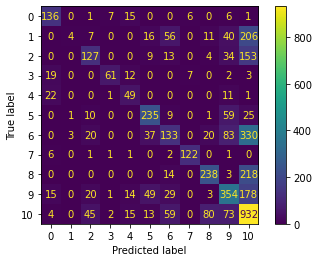

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot();